<a href="https://colab.research.google.com/github/tokishtomar/DataScience_TSF/blob/main/TSF_DataScience_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Sparks Foundation #GRIPJUNE2021**

**Task 2:** Prediction using Unsupervised ML

In this task, we have to develop a classifier for the 'Iris' dataset and predict an optimum numbers of clusters and viusalizing them.

**By: Tokish Tomar**

**Step 1 : Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2 : Loading the Dataset**

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/UnsupervisedML.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Step 3 : Dropping Id Coulumn**

In [ ]:
df = df.drop('Id', axis = 1)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Step 4 : Checking for null values**

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Step 6 : Using Seaborn features: Pair-Plot & Correlation to check dependencies**

[]

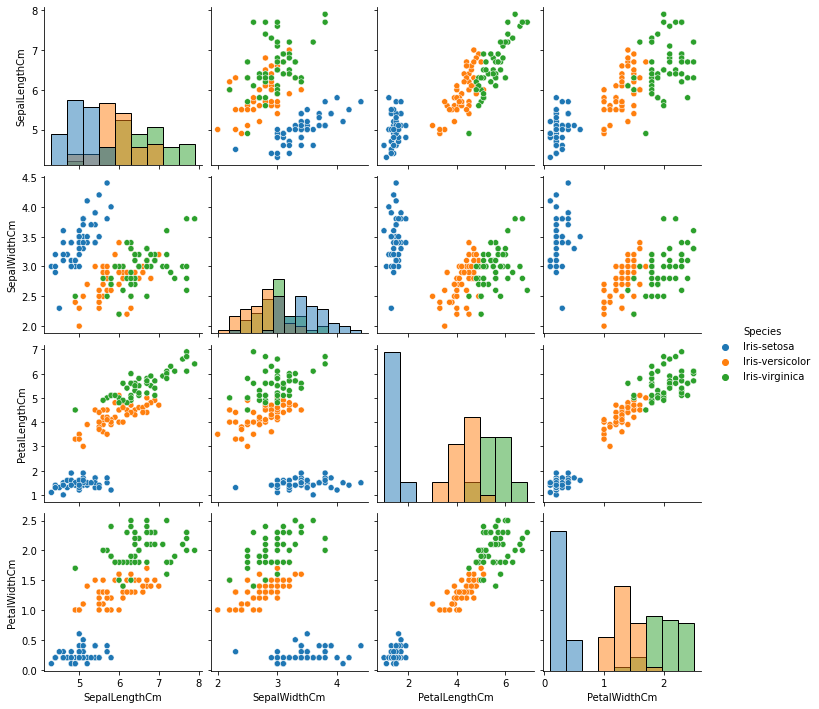

In [ ]:
#Using Pair-Plot
sns.pairplot(df, hue = 'Species', diag_kind = 'hist')
plt.plot()

[]

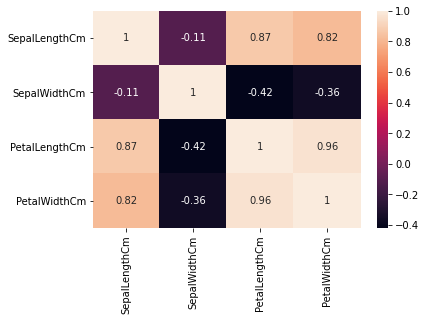

In [ ]:
#Using Correlation
sns.heatmap(df.corr(), annot = True)
plt.plot()

**Step 7 : Finding the optimum number of clusters for k-means classification**

In [ ]:
x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss=[]             #within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

**Step 8 : Plotting the results onto a line graph to observe 'The Elbow'**

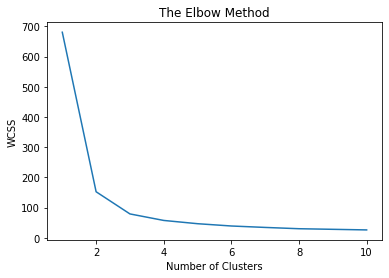

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The optimum clusters is where the elbow occurs. From this, we choose the number of clusters as 3

**Step 9 : Creating the KMeans Classifier**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

**Step 10 : Visualising the clusters - On the first two columns**

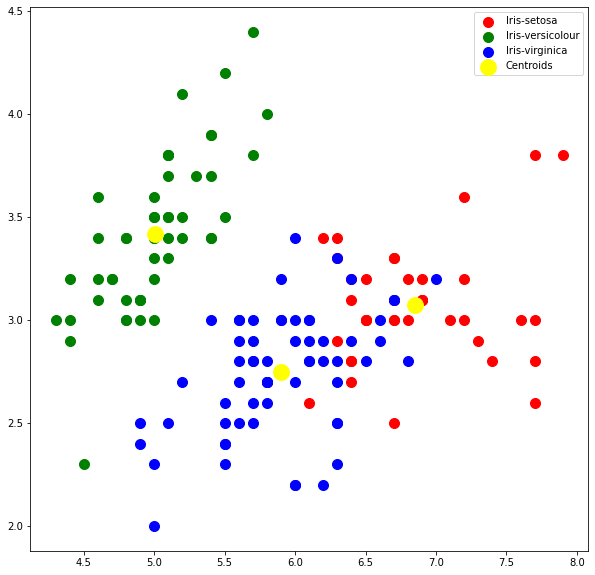

In [ ]:
#Plotting CLusters
plt.rcParams["figure.figsize"] = 10, 10

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label ='Iris-virginica')

#Plotting Centroids of the CLusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()